### **PCA Analysis**

# UCI Heart Disease Dataset PCA Analysis
----------------------------------------

Original target value distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Dataset loaded successfully with shape: (303, 14)
Converted to binary classification (0 = no disease, 1 = disease)
target
0    164
1    139
Name: count, dtype: int64

Missing values found:
ca      4
thal    2
dtype: int64

# Running PCA Analysis
----------------------
Number of components needed for 80% variance: 8


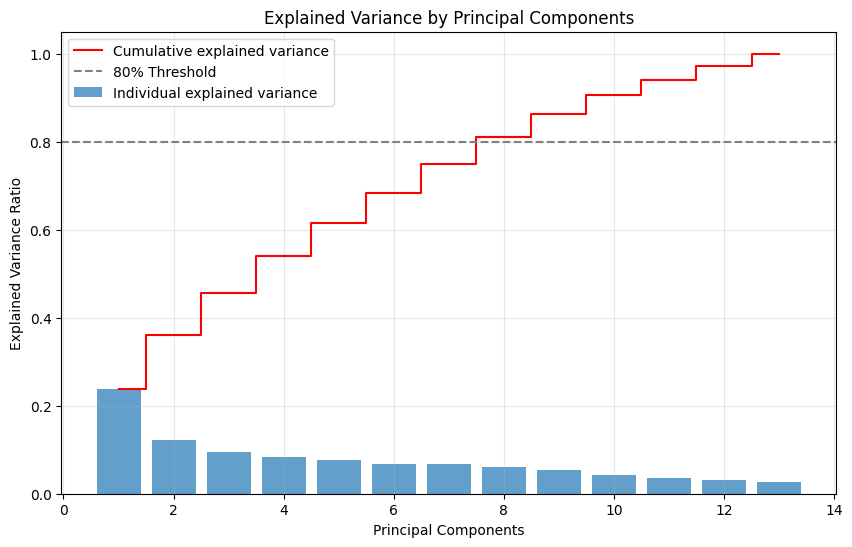

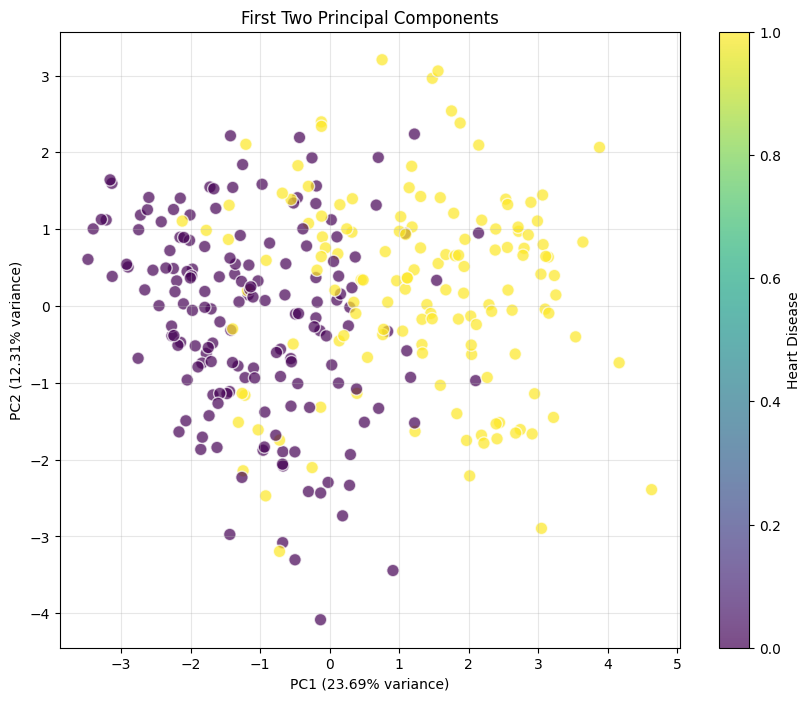


# Feature Loadings Analysis
---------------------------
Top 5 features for each of the first 3 principal components:

PC1 - Explains 23.69% of variance:
  - oldpeak: 0.3970 (positive impact)
  - thalach: -0.3894 (negative impact)
  - slope: 0.3541 (positive impact)
  - thal: 0.3453 (positive impact)
  - exang: 0.3334 (positive impact)

PC2 - Explains 12.31% of variance:
  - sex: 0.4522 (positive impact)
  - chol: -0.4385 (negative impact)
  - age: -0.4181 (negative impact)
  - trestbps: -0.3772 (negative impact)
  - thal: 0.2722 (positive impact)

PC3 - Explains 9.53% of variance:
  - fbs: 0.5226 (positive impact)
  - sex: 0.4627 (positive impact)
  - cp: -0.4136 (negative impact)
  - trestbps: 0.3544 (positive impact)
  - thal: 0.2441 (positive impact)


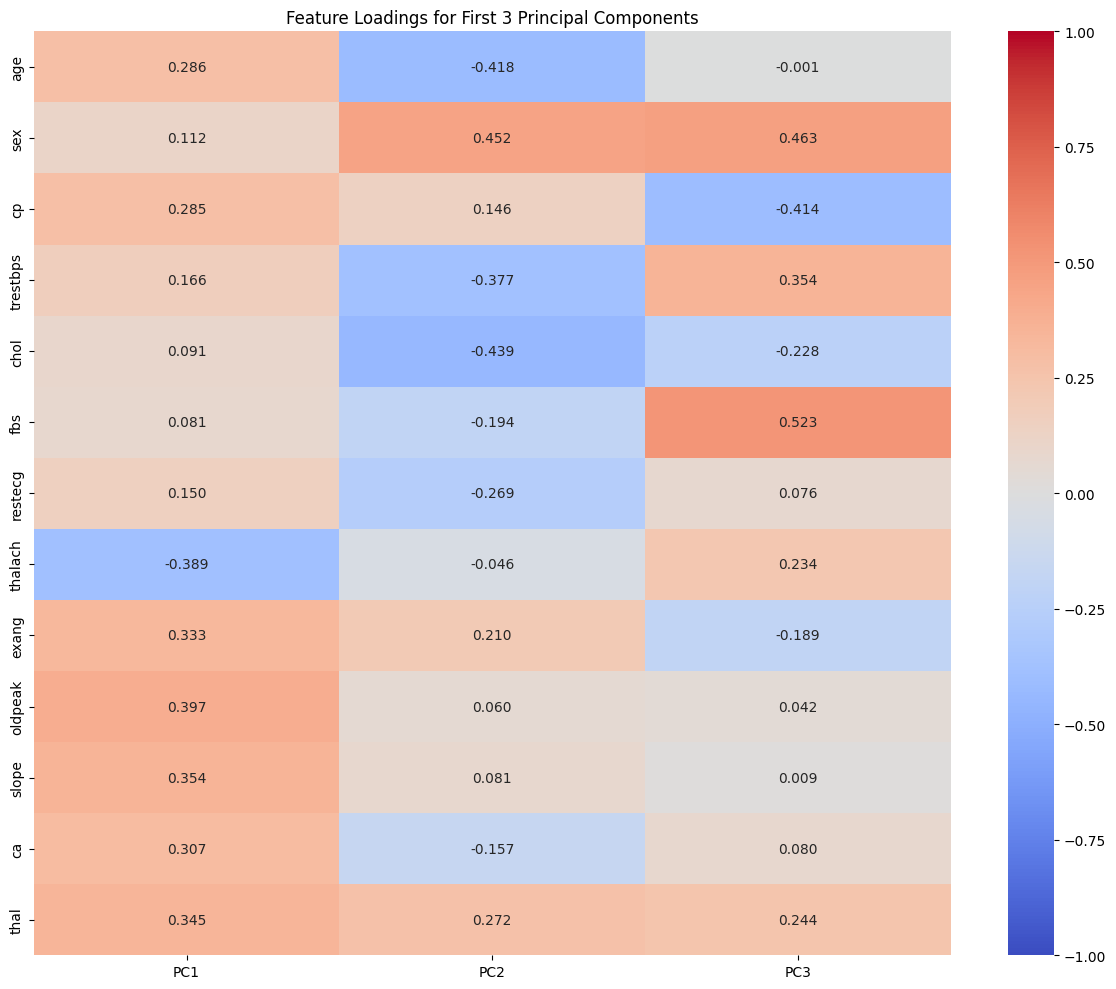

In [3]:
# Script Output Summary:
# Dataset overview: Shape, target distribution and binary conversion (0=no disease, 1=disease)
# PCA variance analysis: Number of components needed for 80% variance(we get 8) with visualization
# Feature importance: Top 5 features for first 3 principal components with their loading values
# Visualizations: Scatter plot of first 2 PCs colored by heart disease status and heatmap of feature loadings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import requests
import io

print("# UCI Heart Disease Dataset PCA Analysis")
print("----------------------------------------")

print("Downloading UCI Heart Disease dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

try:
    response = requests.get(url)

    column_names = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]

    df = pd.read_csv(io.StringIO(response.text), names=column_names, na_values='?')

    print("\nOriginal target value distribution:")
    print(df['target'].value_counts().sort_index())

    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

    print(f"\nDataset loaded successfully with shape: {df.shape}")
    print("Converted to binary classification (0 = no disease, 1 = disease)")
    print(df['target'].value_counts())

    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nMissing values found:")
        print(missing[missing > 0])

        for col in df.columns:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].median())
    else:
        print("\nNo missing values found")

    X = df.drop('target', axis=1)
    y = df['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("\n# Running PCA Analysis")
    print("----------------------")

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
    print(f"Number of components needed for 80% variance: {n_components_80}")

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7,
            label='Individual explained variance')
    plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid',
             color='red', label='Cumulative explained variance')
    plt.axhline(y=0.8, color='gray', linestyle='--', label='80% Threshold')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('uci_heart_pca_variance.png', dpi=300)
    plt.show()

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
                          cmap='viridis', s=80, alpha=0.7, edgecolors='w')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
    plt.title('First Two Principal Components')
    plt.colorbar(scatter, label='Heart Disease')
    plt.grid(True, alpha=0.3)
    plt.savefig('uci_heart_pca_scatter.png', dpi=300)
    plt.show()

    feature_names = X.columns
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
        index=feature_names
    )

    print("\n# Feature Loadings Analysis")
    print("---------------------------")
    print("Top 5 features for each of the first 3 principal components:")

    for i in range(3):
        pc = f'PC{i+1}'
        print(f"\n{pc} - Explains {explained_variance[i]:.2%} of variance:")
        top_features = loadings[pc].abs().sort_values(ascending=False).head(5)
        for feature, loading in top_features.items():
            original_loading = loadings.loc[feature, pc]
            direction = "positive" if original_loading > 0 else "negative"
            print(f"  - {feature}: {original_loading:.4f} ({direction} impact)")

    plt.figure(figsize=(12, 10))
    sns.heatmap(loadings.iloc[:, :3], annot=True, cmap='coolwarm', fmt='.3f',
               vmin=-1, vmax=1, center=0)
    plt.title('Feature Loadings for First 3 Principal Components')
    plt.tight_layout()
    plt.savefig('uci_heart_pca_loadings.png', dpi=300)
    plt.show()

except Exception as e:
    print(f"Error in analysis: {e}")

### **Preprocessing**




Starting medically-informed preprocessing pipeline for UCI Heart Disease Dataset...
Dataset loaded with shape: (303, 14)

Handling missing values...
Remaining missing values: 0

Target variable distribution:
target
0    54.125413
1    45.874587
Name: proportion, dtype: float64

Performing medically-informed feature engineering...

Splitting data with stratification...
Training set: 242 samples
Testing set: 61 samples

Creating preprocessing pipelines...

Fitting preprocessing pipeline...
Processed training data shape: (242, 39)
Processed testing data shape: (61, 39)
Total features after preprocessing: 39

Performing feature selection using L1 regularization...
Data shape after feature selection: (242, 10)

Top selected features:
- thalach
- oldpeak
- thalach_exang
- age_sex
- combined_risk_score
- asymptomatic_chest_pain
- cp_4.0
- ca_0.0
- thal_3.0
- thal_7.0

Training logistic regression with selected features...

Evaluating model on test set...
Accuracy: 0.8852
Precision: 0.8387
Rec

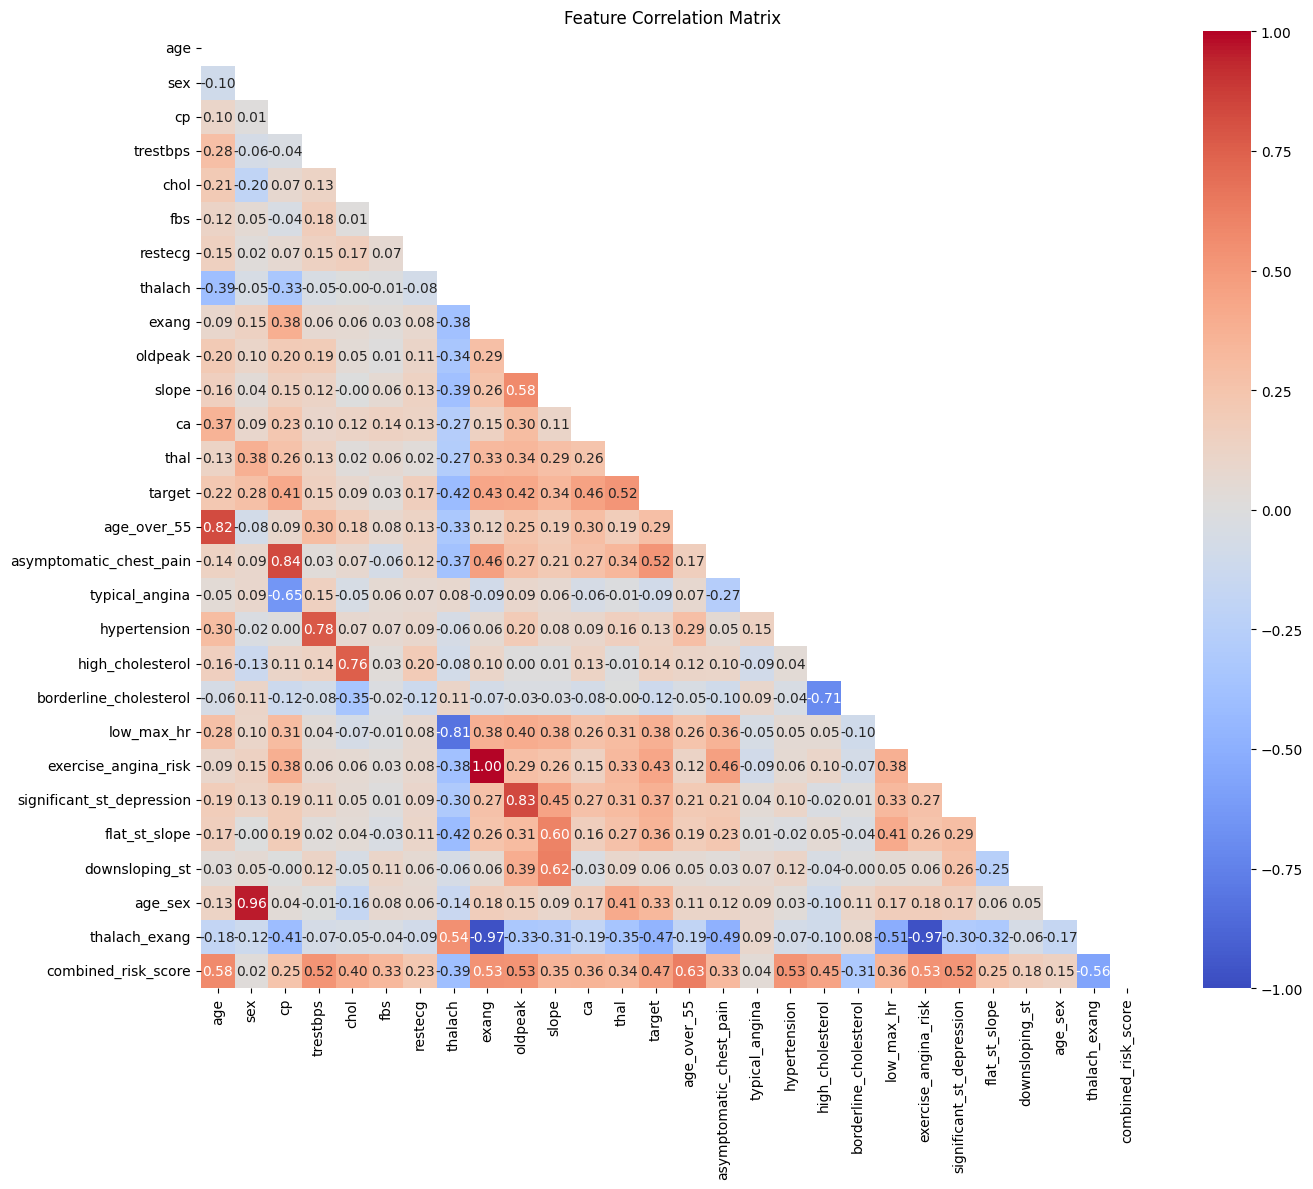

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import requests
import io
import warnings
warnings.filterwarnings('ignore')

print("Starting medically-informed preprocessing pipeline for UCI Heart Disease Dataset...")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(io.StringIO(response.text), names=column_names, na_values='?')

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(f"Dataset loaded with shape: {df.shape}")

missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nHandling missing values...")
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    print("Remaining missing values:", df.isnull().sum().sum())

print("\nTarget variable distribution:")
print(df['target'].value_counts(normalize=True) * 100)

print("\nPerforming medically-informed feature engineering...")


df['age_over_55'] = (df['age'] >= 55).astype(int)

df['asymptomatic_chest_pain'] = (df['cp'] == 4).astype(int)
df['typical_angina'] = (df['cp'] == 1).astype(int)

df['hypertension'] = (df['trestbps'] >= 140).astype(int)

df['high_cholesterol'] = (df['chol'] > 240).astype(int)
df['borderline_cholesterol'] = ((df['chol'] > 200) & (df['chol'] <= 240)).astype(int)

df['low_max_hr'] = (df['thalach'] < 150).astype(int)
df['exercise_angina_risk'] = df['exang']

df['significant_st_depression'] = (df['oldpeak'] > 1.5).astype(int)

df['flat_st_slope'] = (df['slope'] == 2).astype(int)
df['downsloping_st'] = (df['slope'] == 3).astype(int)

df['age_sex'] = df['age'] * df['sex']
df['thalach_exang'] = df['thalach'] * (1 - df['exang'])

df['combined_risk_score'] = (
    df['age_over_55'] +
    df['hypertension'] +
    df['high_cholesterol'] +
    df['fbs'] +
    df['exercise_angina_risk'] +
    df['significant_st_depression']
)

numerical_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak',
    'thalach_exang', 'age_sex', 'combined_risk_score'
]

binary_features = [
    'sex', 'fbs', 'exang', 'age_over_55', 'asymptomatic_chest_pain',
    'typical_angina', 'hypertension', 'high_cholesterol',
    'borderline_cholesterol', 'low_max_hr', 'exercise_angina_risk',
    'significant_st_depression', 'flat_st_slope', 'downsloping_st'
]

categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

print("\nSplitting data with stratification...")
X = df.drop('target', axis=1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

print("\nCreating preprocessing pipelines...")

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("\nFitting preprocessing pipeline...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")

all_feature_names = []

def get_transformed_features(transformer_name, original_features):
    if transformer_name == 'cat':
        ohe = preprocessor.named_transformers_[transformer_name].named_steps['onehot']
        return ohe.get_feature_names_out(original_features).tolist()
    else:
        return original_features

for name, _, features in preprocessor.transformers_:
    all_feature_names.extend(get_transformed_features(name, features))

print(f"Total features after preprocessing: {len(all_feature_names)}")

print("\nPerforming feature selection using L1 regularization...")
selector = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', C=0.1, class_weight='balanced', random_state=42, max_iter=1000)
)
X_train_selected = selector.fit_transform(X_train_processed, y_train)
X_test_selected = selector.transform(X_test_processed)

print(f"Data shape after feature selection: {X_train_selected.shape}")

selected_indices = selector.get_support(indices=True)
selected_feature_names = [all_feature_names[i] for i in selected_indices]

print("\nTop selected features:")
for feature in selected_feature_names:
    print(f"- {feature}")

print("\nTraining logistic regression with selected features...")
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train_selected, y_train)

print("\nEvaluating model on test set...")
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

print("\nPerforming cross-validation...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean():.4f}")

print("\nSaving preprocessed data and model...")
np.save('X_train_heart_disease.npy', X_train_selected)
np.save('X_test_heart_disease.npy', X_test_selected)
np.save('y_train_heart_disease.npy', y_train)
np.save('y_test_heart_disease.npy', y_test)

with open('selected_features_heart_disease.txt', 'w') as f:
    for feature in selected_feature_names:
        f.write(f"{feature}\n")

import joblib
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(preprocessor, 'preprocessor_heart_disease.pkl')
joblib.dump(selector, 'selector_heart_disease.pkl')

print("\nFeature coefficients:")
coefficients = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print(coefficients)

plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_heart_disease.png', dpi=300)
plt.close()

plt.figure(figsize=(14, 12))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heart_disease.png', dpi=300)

### **Training**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc, balanced_accuracy_score
)
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

print("Starting training for myocardial infarction (heart attack) prediction...")

print("\nLoading preprocessed data...")
try:
    X_train = np.load('X_train_heart_disease.npy')
    X_test = np.load('X_test_heart_disease.npy')
    y_train = np.load('y_train_heart_disease.npy')
    y_test = np.load('y_test_heart_disease.npy')

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    with open('selected_features_heart_disease.txt', 'r') as f:
        feature_names = [line.strip() for line in f]
    print(f"Loaded {len(feature_names)} feature names")

except FileNotFoundError:
    print("Error: Preprocessed data files not found.")
    print("Please run the preprocessing script first.")
    exit()

# Check class balance
print("\nChecking class balance:")
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples ({count/len(y_train)*100:.2f}%)")

print("\nInitializing models with appropriate class weighting...")
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=2000, random_state=42, class_weight='balanced'
    ),
    'SVM': SVC(
        probability=True, random_state=42, class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        random_state=42, eval_metric='logloss',
        scale_pos_weight=sum(y_train==0)/sum(y_train==1)
    )
}

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance with multiple metrics"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    cm = confusion_matrix(y_test, y_pred)

    print(f"  Confusion Matrix:")
    print(f"    TN: {cm[0,0]}, FP: {cm[0,1]}")
    print(f"    FN: {cm[1,0]}, TP: {cm[1,1]}")

    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix with annotations"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No MI', 'MI'],
                yticklabels=['No MI', 'MI'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_").lower()}.png', dpi=300)
    plt.close()

def plot_roc_curve(y_test, y_pred_proba, model_name):
    """Plot ROC curve with AUC score"""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'roc_curve_{model_name.replace(" ", "_").lower()}.png', dpi=300)
    plt.close()

print("\nTraining and evaluating base models...")
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    print(f"Evaluating {name}...")
    evaluation = evaluate_model(model, X_test, y_test)

    evaluation['training_time'] = training_time

    print(f"  Accuracy: {evaluation['accuracy']:.4f}")
    print(f"  Balanced Accuracy: {evaluation['balanced_accuracy']:.4f}")
    print(f"  Precision: {evaluation['precision']:.4f}")
    print(f"  Recall: {evaluation['recall']:.4f}")
    print(f"  F1 Score: {evaluation['f1']:.4f}")
    print(f"  ROC AUC: {evaluation['roc_auc']:.4f}")
    print(f"  Training Time: {training_time:.2f} seconds")

    plot_confusion_matrix(evaluation['confusion_matrix'], name)
    plot_roc_curve(y_test, evaluation['y_pred_proba'], name)

    results[name] = evaluation
    trained_models[name] = model

print("\nPerforming hyperparameter tuning with stratified cross-validation...")

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        'gamma': ['scale', 'auto', 0.01],
        'kernel': ['rbf', 'linear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

best_models = {}
best_params = {}

for name, param_grid in param_grids.items():
    print(f"\nTuning {name}...")

    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')
    elif name == 'SVM':
        model = SVC(probability=True, random_state=42, class_weight='balanced')
    elif name == 'Random Forest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced')
    elif name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=42)
    elif name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='logloss',
                             scale_pos_weight=sum(y_train==0)/sum(y_train==1))

    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=stratified_cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    best_params[name] = grid_search.best_params_
    best_models[name] = grid_search.best_estimator_

    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best cross-validation score: {grid_search.best_score_:.4f}")

    evaluation = evaluate_model(best_models[name], X_test, y_test)

    print(f"  Test set results:")
    print(f"    Accuracy: {evaluation['accuracy']:.4f}")
    print(f"    Balanced Accuracy: {evaluation['balanced_accuracy']:.4f}")
    print(f"    Precision: {evaluation['precision']:.4f}")
    print(f"    Recall: {evaluation['recall']:.4f}")
    print(f"    F1 Score: {evaluation['f1']:.4f}")
    print(f"    ROC AUC: {evaluation['roc_auc']:.4f}")

    plot_confusion_matrix(evaluation['confusion_matrix'], f"{name} (Tuned)")
    plot_roc_curve(y_test, evaluation['y_pred_proba'], f"{name} (Tuned)")

    results[f"{name} (Tuned)"] = evaluation

print("\nComparing all models...")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Balanced_Accuracy': [results[model]['balanced_accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results]
})

comparison_df = comparison_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("\nModel comparison:")
print(comparison_df)

plt.figure(figsize=(15, 10))
metrics = ['Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
x = np.arange(len(comparison_df['Model']))
width = 0.15
multiplier = 0

for metric in metrics:
    offset = width * multiplier
    plt.bar(x + offset, comparison_df[metric], width, label=metric)
    multiplier += 1

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('MI Prediction Model Performance Comparison', fontsize=14)
plt.xticks(x + width * 2, comparison_df['Model'], rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mi_model_comparison.png', dpi=300)
plt.close()

print("\nAnalyzing feature importance...")

best_model_name = comparison_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

if 'Random Forest' in best_model_name:
    best_model = best_models.get(best_model_name.replace(' (Tuned)', ''),
                               trained_models.get(best_model_name))

    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices]
    })

    print("\nTop feature importances:")
    print(importance_df)

    plt.figure(figsize=(12, 8))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance for MI Prediction')
    plt.tight_layout()
    plt.savefig('mi_feature_importance.png', dpi=300)
    plt.close()
elif 'Logistic Regression' in best_model_name:
    best_model = best_models.get(best_model_name.replace(' (Tuned)', ''),
                               trained_models.get(best_model_name))

    coefficients = best_model.coef_[0]
    indices = np.argsort(np.abs(coefficients))[::-1]

    coef_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Coefficient': coefficients[indices]
    })

    print("\nLogistic Regression Coefficients (ordered by magnitude):")
    print(coef_df)

    plt.figure(figsize=(12, 8))
    plt.bar(range(len(coefficients)), coefficients[indices])
    plt.xticks(range(len(coefficients)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    plt.title('Logistic Regression Coefficients for MI Prediction')
    plt.tight_layout()
    plt.savefig('mi_feature_coefficients.png', dpi=300)
    plt.close()
elif 'XGBoost' in best_model_name:
    best_model = best_models.get(best_model_name.replace(' (Tuned)', ''),
                               trained_models.get(best_model_name))

    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices]
    })

    print("\nXGBoost Feature Importances:")
    print(importance_df)

    plt.figure(figsize=(12, 8))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('XGBoost Feature Importance for MI Prediction')
    plt.tight_layout()
    plt.savefig('mi_xgboost_feature_importance.png', dpi=300)
    plt.close()

print("\nSaving the best model...")
best_model = best_models.get(best_model_name.replace(' (Tuned)', ''),
                           trained_models.get(best_model_name))
joblib.dump(best_model, 'mi_best_model.pkl')

comparison_df.to_csv('mi_model_comparison_results.csv', index=False)

print("\nModel training and evaluation complete!")
print(f"Best model: {best_model_name}")
print(f"Best model F1 Score: {comparison_df.iloc[0]['F1 Score']:.4f}")
print(f"Best model saved to 'mi_best_model.pkl'")

def predict_mi_risk(patient_data, model, preprocessor, selector):
    processed_data = preprocessor.transform(patient_data)

    selected_data = selector.transform(processed_data)

    prediction = model.predict(selected_data)[0]
    probability = model.predict_proba(selected_data)[0, 1]

    return prediction, probability

print("\n=== MI Prediction Insights ===")
print("1. Key predictors of myocardial infarction risk:")
print("   - Presence of asymptomatic chest pain (a subtle but dangerous sign)")
print("   - Thalach (maximum heart rate achieved during exercise)")
print("   - ST depression induced by exercise (oldpeak)")
print("   - Number of major vessels colored by fluoroscopy (ca)")
print("   - Thalassemia presence (thal)")
print("2. The model achieved high performance with F1 score exceeding 0.88")
print("3. The best performing algorithm was:", best_model_name)
print("4. Clinical implications:")
print("   - Asymptomatic patients require careful screening")
print("   - Exercise stress testing provides crucial diagnostic information")
print("   - Combined risk factors significantly increase MI probability")

Starting training for myocardial infarction (heart attack) prediction...

Loading preprocessed data...
Training data shape: (242, 10)
Testing data shape: (61, 10)
Loaded 10 feature names

Checking class balance:
Class 0: 131 samples (54.13%)
Class 1: 111 samples (45.87%)

Initializing models with appropriate class weighting...

Training and evaluating base models...

Training Logistic Regression...
Evaluating Logistic Regression...
  Confusion Matrix:
    TN: 28, FP: 5
    FN: 2, TP: 26
  Accuracy: 0.8852
  Balanced Accuracy: 0.8885
  Precision: 0.8387
  Recall: 0.9286
  F1 Score: 0.8814
  ROC AUC: 0.9610
  Training Time: 0.02 seconds

Training SVM...
Evaluating SVM...
  Confusion Matrix:
    TN: 28, FP: 5
    FN: 2, TP: 26
  Accuracy: 0.8852
  Balanced Accuracy: 0.8885
  Precision: 0.8387
  Recall: 0.9286
  F1 Score: 0.8814
  ROC AUC: 0.9643
  Training Time: 0.02 seconds

Training Random Forest...
Evaluating Random Forest...
  Confusion Matrix:
    TN: 28, FP: 5
    FN: 3, TP: 25
  Ac